## <center> Bank customer churn analysis

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

### 9.1

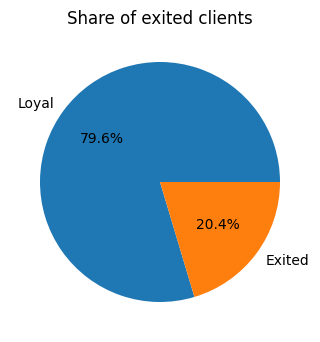

In [15]:
churn_share = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
labels = ['Loyal','Exited']
axes.pie(
    churn_share,
    labels=labels,
    autopct='%.1f%%',
)
axes.set_title('Share of exited clients');

Exited clients share is slightly over 20% of total.

### 9.2

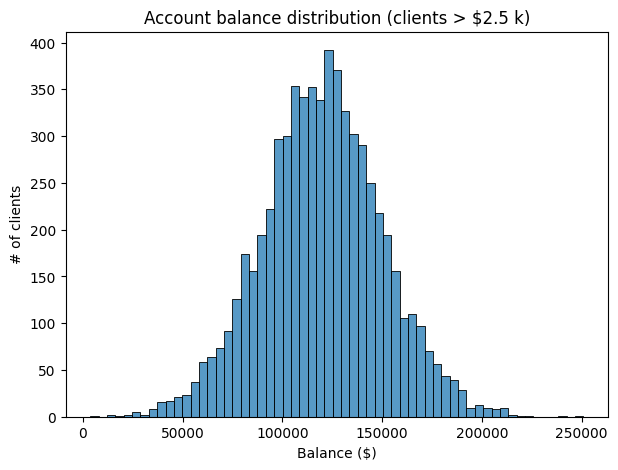

In [23]:
import seaborn as sns
balance_hist = churn_data[churn_data['Balance'] > 2500]
fig = plt.figure(figsize=(7, 5))
histplot = sns.histplot(
    data=balance_hist,
    x='Balance',
);
histplot.set_title('Account balance distribution (clients > $2.5 k)');
histplot.set_ylabel('# of clients');
histplot.set_xlabel('Balance ($)');

Majority of clients have balance in the range from $80k to $150k

### 9.3

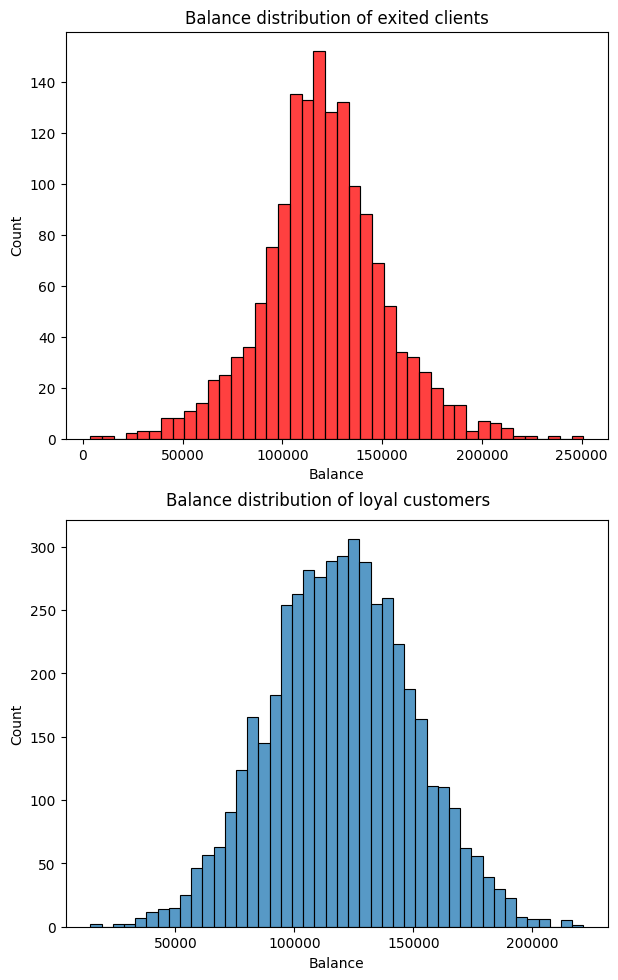

In [54]:
exit_hist = balance_hist[balance_hist['Exited'] == 1]
loyal_hist = balance_hist[balance_hist['Exited'] == 0]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 5))
sns.histplot(
    data=exit_hist,
    x='Balance',
    color='red',
    ax=axes[0]
);
#sns.histplot[0].set_ylabel('Exited clients');
axes[0].set_title('Balance distribution of exited clients')
sns.histplot(
    data=loyal_hist,
    x='Balance',
    ax=axes[1]
);
plt.subplots_adjust(top=1.9)
plt.suptitle('Balance distribution of loyal customers');

Among exited there are clients with higher balance that loyal (up to 250 k), otherwise dsitributions are fairly similar. The reason for high balance clients to leave could be unfavourable conditions or lack of products that could be interesting for such clients. 

### 9.4

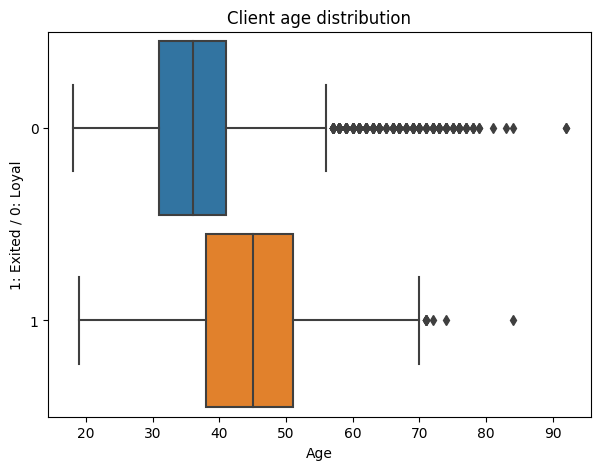

In [59]:
fig = plt.figure(figsize=(7, 5))
boxplot = sns.boxplot(
    data=balance_hist,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Client age distribution');
boxplot.set_ylabel('1: Exited / 0: Loyal');

Loyal customers are younger than Exited (the latter are mostly in the range from 38 to 51), therefore the bank should introduce products that are appealing to elder people. However, there are much more range outliers for Loyal customers compared to Exited.

### 9.5

In [152]:
import plotly
import plotly.express as px
fig = px.scatter(
    data_frame=churn_data, 
    x = 'EstimatedSalary', 
    y = 'CreditScore', 
    color='Exited', 
    title='Estimated Salary / Credit Score dependancy',
    width=700,
    height=500
);
fig.show()

This graph shows that clients with Credit Score below 400 are likely to exit. This dependance is observed accross the whole salary range. 

### 9.6

In [109]:
gender_data = churn_data.groupby(
    by='Gender',
    as_index=False
)[['Exited']].mean()
gender_data['Exited']=(gender_data['Exited']*100).round(decimals=1)
fig = px.bar(
    data_frame=gender_data, 
    x="Gender", 
    y="Exited", 
    color='Gender', 
    text = 'Exited',
    orientation='v',
    height=500,
    width=500,
    title='Female exit more often than Male'
)
fig.show()

25% of Female leave the bank as opposed to 16.5% Male

### 9.7

In [121]:
product_data = churn_data.groupby(
    by='NumOfProducts',
    as_index=False
)[['Exited']].mean()
product_data['Exited']=(product_data['Exited']*100).round(decimals=1)
fig = px.bar(
    data_frame=product_data, 
    x="NumOfProducts", 
    y="Exited", 
    color="NumOfProducts", 
    text = 'Exited',
    orientation='v',
    height=500,
    width=500,
    title='High product users tend to exit'
)
fig.show()

Clients that use 3 products and more are >3 times likely to exit compared to those that use 1 product. The bank needs to consider relaunching its' product portfolio.

### 9.8

In [130]:
active_data = churn_data.groupby(
    by='IsActiveMember',
    as_index=False
)[['Exited']].mean()
active_data['Exited']=(active_data['Exited']*100).round(decimals=1)
fig = px.bar(
    data_frame=active_data, 
    x="IsActiveMember", 
    y="Exited", 
    color="IsActiveMember", 
    text = 'Exited',
    orientation='v',
    height=500,
    width=500,
    title='Non-active clients exit 2 times more often'
)
fig.show()

27% of non-active clients exit, as opposed to 14% of active clients. To decrease non-active clients' exit rate, the bank needs to drive more engagement with customers, promote its' services and products, make special offers for credit card issuing, and so on.  

### 9.9

In [144]:
geo_data = churn_data.groupby(
    by='Geography',
    as_index=False
)[['Exited']].mean()
geo_data['Exited']=(geo_data['Exited']*100).round(decimals=1)
fig = px.choropleth(
    data_frame=geo_data, 
    locations="Geography", 
    locationmode = "country names",
    color="Exited",
    range_color=[0, 100],
    title='Exit share in Germany is 2 times higher',
    width=800,
    height=500,
    scope='europe',
    color_continuous_scale='Reds'
)
fig.show()

32% of German clients exited the bank, which is 2 times higher than in other countries. The reason for that could be that banking competition landscape is more intense in Germany (maybe some new interesting bank appeared on the market, or new appealing services with existing banks).

### 9.10

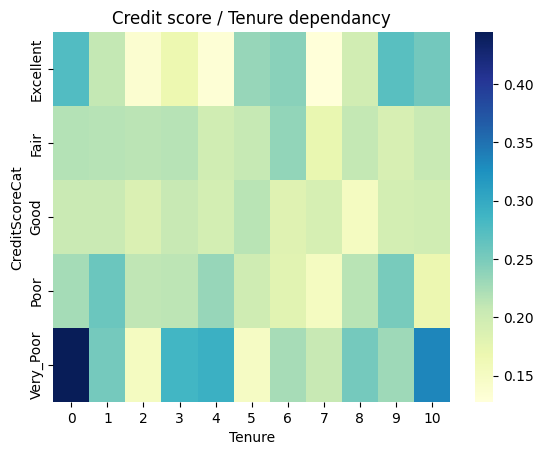

In [151]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
#churn_data['CreditScoreCat']=churn_data['CreditScore'].map(get_credit_score_cat)
pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Credit score / Tenure dependancy');

Clients with low credit rating (Very Poor / Poor) tend to exit more than in other categories. However, clients with Excellent credit rating also demopnstarte high exit rates, especially within first year, or in 5 years after becoming a bank's client. 